# MNIST Handwrittten Digits Classification

## Prepare the Problem

Import libraries

In [22]:
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler

Load the dataset

In [3]:
dataset = fetch_openml('mnist_784', version=1, as_frame=False)

In [12]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
X, y = dataset["data"], dataset["target"]
print(X.shape, y.shape)

(70000, 784) (70000,)


In [20]:
print(f"X dtype: {type(X[0])}")
print(f"y dtype: {type(y[0])}")

X dtype: <class 'numpy.ndarray'>
y dtype: <class 'str'>


Change the data type of y to integer

In [5]:
y = y.astype(np.uint8)

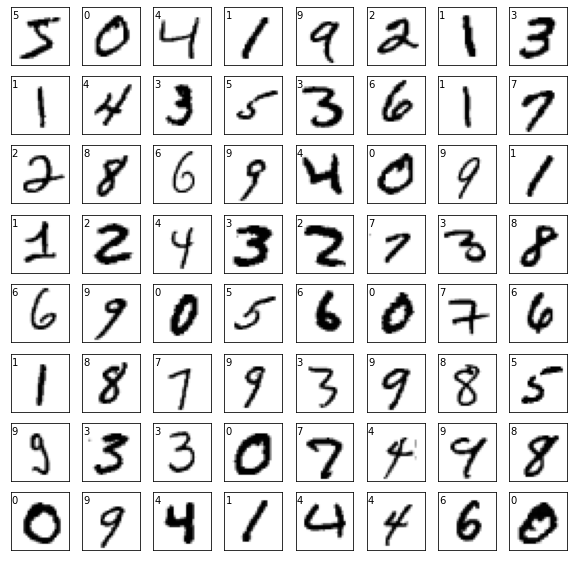

In [6]:
fig = plt.figure(figsize=(10, 10))

for i in range(64):
    digit = X[i]
    digit_image = digit.reshape(28, 28)
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digit_image, cmap=plt.cm.binary)
    ax.text(0, 5, str(y[i]))

In [24]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


Feature scaling

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_train)

In [33]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)

SVC()

In [34]:
train_predicted = svm_clf.predict(X_train_scaled)

In [42]:
filename = 'model/svm_model.sav'
pickle.dump(svm_clf, open(filename, 'wb'))
filename2 = 'model/train_predicted_sav.sav'
pickle.dump(train_predicted, open(filename2, 'wb'))

In [43]:
loaded_model = pickle.load(open('model/train_predicted_sav.sav', 'rb'))

In [45]:
print(confusion_matrix(y_train, loaded_model))

[[5896    2    0    1    1    3   10    1    8    1]
 [   1 6690   16    7    5    0    1    8    5    9]
 [   8    6 5898    4    9    1    1   14   14    3]
 [   0    7   17 6011    3   25    0   20   36   12]
 [   2   10    6    0 5763    0    7    4    2   48]
 [   6    3    5   32    6 5343   16    1    7    2]
 [  13    5    1    0    5   12 5877    0    5    0]
 [   1   21   17    3   17    0    0 6175    1   30]
 [   5   26    7   22    7   15    7    7 5749    6]
 [   6    8    2   29   44    5    1   46   12 5796]]


In [46]:
print((classification_report(y_train, loaded_model)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5923
           1       0.99      0.99      0.99      6742
           2       0.99      0.99      0.99      5958
           3       0.98      0.98      0.98      6131
           4       0.98      0.99      0.98      5842
           5       0.99      0.99      0.99      5421
           6       0.99      0.99      0.99      5918
           7       0.98      0.99      0.98      6265
           8       0.98      0.98      0.98      5851
           9       0.98      0.97      0.98      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



In [ ]:
cv = cross_val_score(svm_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
cv

In [ ]:
filename = 'model/svm_model_cv.sav'
pickle.dump(cv, open(filename, 'wb'))